<a href="https://colab.research.google.com/github/alastra32/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/DS_Unit_1_Sprint_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [0]:
# TODO
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


###Load the data as a pandas data frame.

In [2]:
#Getting the Data
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data


--2019-07-22 03:45:52--  http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3103 (3.0K) [application/x-httpd-php]
Saving to: ‘haberman.data’

haberman.data       100%[===================>]   3.03K  --.-KB/s    in 0s      

2019-07-22 03:45:52 (412 MB/s) - ‘haberman.data’ saved [3103/3103]



In [3]:
!ls

haberman.data  sample_data


In [4]:
!head haberman.data

30,64,1,1
30,62,3,1
30,65,0,1
31,59,2,1
31,65,4,1
33,58,10,1
33,60,0,1
34,59,0,2
34,66,9,2
34,58,30,1


In [5]:
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.names


--2019-07-22 03:45:55--  http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.names
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1368 (1.3K) [application/x-httpd-php]
Saving to: ‘haberman.names’

haberman.names      100%[===================>]   1.34K  --.-KB/s    in 0s      

2019-07-22 03:45:55 (172 MB/s) - ‘haberman.names’ saved [1368/1368]



In [6]:
!ls

haberman.data  haberman.names  sample_data


In [7]:
!head haberman.names

1. Title: Haberman's Survival Data

2. Sources:
   (a) Donor:   Tjen-Sien Lim (limt@stat.wisc.edu)
   (b) Date:    March 4, 1999

3. Past Usage:
   1. Haberman, S. J. (1976). Generalized Residuals for Log-Linear
      Models, Proceedings of the 9th International Biometrics
      Conference, Boston, pp. 104-122.


Data Source :http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Abstract: Dataset contains cases from study conducted on the survival of patients who had undergone surgery for breast cancer

Data Set Characteristics:  
Multivariate

Number of Instances:
306

Area:
Life

Attribute Characteristics:
Integer

Number of Attributes:
3

Date Donated
1999-03-04

Associated Tasks:
Classification

Missing Values?
No

Number of Web Hits:
182024


Attribute Information:

1. Age of patient at time of operation (numerical) 
2. Patient's year of operation (year - 1900, numerical) 
3. Number of positive axillary nodes detected (numerical) 
4. Survival status (class attribute) 
-- 1 = the patient survived 5 years or longer 
-- 2 = the patient died within 5 year



In [8]:
col_headers = ['patient_age','patient_year','positive_axillary_nodes','survival_status']
data_url='http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data'
df = pd.read_csv(data_url, header=None, names=col_headers)

df.head()

,patient_age,patient_year,positive_axillary_nodes,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


###Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).

From UCI Number of Instances: 306

In [9]:
print(df.shape)

(306, 4)


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
patient_age                306 non-null int64
patient_year               306 non-null int64
positive_axillary_nodes    306 non-null int64
survival_status            306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


In [11]:
df.describe()

,patient_age,patient_year,positive_axillary_nodes,survival_status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


We have validated that all data was uploaded and in accordance with what the dataset description from UCI determines.

###Validate that you have no missing values.

In [12]:
df.isna().sum()

patient_age                0
patient_year               0
positive_axillary_nodes    0
survival_status            0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
patient_age                306 non-null int64
patient_year               306 non-null int64
positive_axillary_nodes    306 non-null int64
survival_status            306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


We have validated that the data has no missing values.

### Add informative names to the features.

In [14]:
df.columns

Index(['patient_age', 'patient_year', 'positive_axillary_nodes',
       'survival_status'],
      dtype='object')

As I named the columns I provided them with informative names while I was uploading the data onto the pandas dataframe.

###The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

In [15]:
df['surviving5years']=np.where(df['survival_status'] ==2,0,1)
df.head()

,patient_age,patient_year,positive_axillary_nodes,survival_status,surviving5years
0,30,64,1,1,1
1,30,62,3,1,1
2,30,65,0,1,1
3,31,59,2,1,1
4,31,65,4,1,1


In [16]:
df[df['survival_status']==2].head()

,patient_age,patient_year,positive_axillary_nodes,survival_status,surviving5years
7,34,59,0,2,0
8,34,66,9,2,0
24,38,69,21,2,0
34,39,66,0,2,0
43,41,60,23,2,0


We've been able to create a new column that has a encoding of binary variables for surviving more than 5 years called "surviving5years".

###At the end, print the first five rows of the dataset to demonstrate the above.

In [17]:
df.head(5)

,patient_age,patient_year,positive_axillary_nodes,survival_status,surviving5years
0,30,64,1,1,1
1,30,62,3,1,1
2,30,65,0,1,1
3,31,59,2,1,1
4,31,65,4,1,1


## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [18]:
# TODO

df.head()

,patient_age,patient_year,positive_axillary_nodes,survival_status,surviving5years
0,30,64,1,1,1
1,30,62,3,1,1
2,30,65,0,1,1
3,31,59,2,1,1
4,31,65,4,1,1


In [19]:
df.describe()

,patient_age,patient_year,positive_axillary_nodes,survival_status,surviving5years
count,306.000000,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706,0.735294
std,10.803452,3.249405,7.189654,0.441899,0.441899
min,30.000000,58.000000,0.000000,1.000000,0.000000
25%,44.000000,60.000000,0.000000,1.000000,0.000000
50%,52.000000,63.000000,1.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000,1.000000
max,83.000000,69.000000,52.000000,2.000000,1.000000


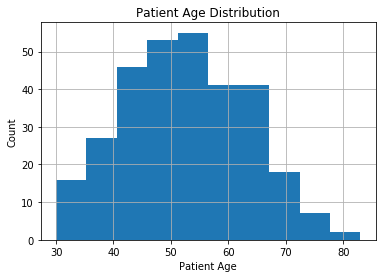

In [20]:
df.patient_age.hist()
plt.title ('Patient Age Distribution')
plt.ylabel('Count')
plt.xlabel('Patient Age')
plt.show()

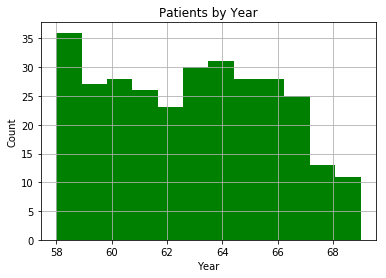

In [21]:
df.patient_year.hist(color='green',bins=12)
plt.title ('Patients by Year')
plt.ylabel('Count')
plt.xlabel('Year')
plt.show()

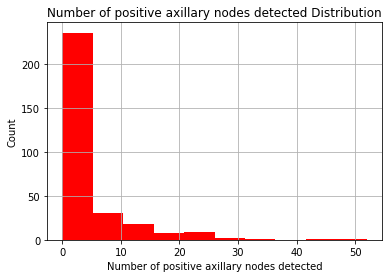

In [22]:
df.positive_axillary_nodes.hist(color='red')
plt.title ('Number of positive axillary nodes detected Distribution')
plt.ylabel('Count')
plt.xlabel('Number of positive axillary nodes detected')
plt.show()

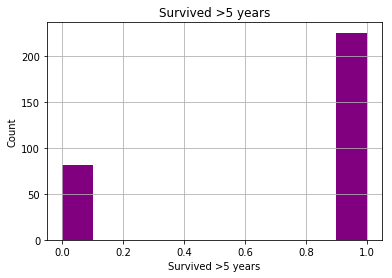

In [23]:
df.surviving5years.hist(color='Purple')
plt.title ('Survived >5 years')
plt.ylabel('Count')
plt.xlabel('Survived >5 years')
plt.show()

In [24]:
# Binning Age

df['age_bins']=pd.cut(df['patient_age'],[29,39,49,59,69,79,89])
df['nodes_bins']=pd.cut(df['positive_axillary_nodes'],[-1,5,10,15,20,25,53], include_lowest=True ).astype('<U32')

df.head()


,patient_age,patient_year,positive_axillary_nodes,survival_status,surviving5years,age_bins,nodes_bins
0,30,64,1,1,1,"(29, 39]","(-1.001, 5.0]"
1,30,62,3,1,1,"(29, 39]","(-1.001, 5.0]"
2,30,65,0,1,1,"(29, 39]","(-1.001, 5.0]"
3,31,59,2,1,1,"(29, 39]","(-1.001, 5.0]"
4,31,65,4,1,1,"(29, 39]","(-1.001, 5.0]"


In [25]:
pd.crosstab(df['age_bins'], df['patient_year'],normalize='all')

patient_year,58,59,60,61,62,63,64,65,66,67,68,69
age_bins,,,,,,,,,,,,
"(29, 39]",0.013072,0.016340,0.029412,0.003268,0.006536,0.016340,0.009804,0.006536,0.013072,0.009804,0.000000,0.006536
"(39, 49]",0.035948,0.019608,0.019608,0.022876,0.022876,0.032680,0.032680,0.026144,0.019608,0.026144,0.006536,0.009804
"(49, 59]",0.029412,0.029412,0.035948,0.029412,0.026144,0.029412,0.039216,0.026144,0.029412,0.019608,0.009804,0.019608
"(59, 69]",0.026144,0.019608,0.006536,0.029412,0.013072,0.009804,0.016340,0.022876,0.026144,0.016340,0.016340,0.000000
"(69, 79]",0.009804,0.003268,0.000000,0.000000,0.006536,0.009804,0.003268,0.009804,0.003268,0.009804,0.009804,0.000000
"(79, 89]",0.003268,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [26]:
pd.crosstab(df['age_bins'], df['nodes_bins'])

nodes_bins,"(-1.001, 5.0]","(10.0, 15.0]","(15.0, 20.0]","(20.0, 25.0]","(25.0, 53.0]","(5.0, 10.0]"
age_bins,,,,,,
"(29, 39]",30,3,0,1,1,5
"(39, 49]",63,5,4,2,1,9
"(49, 59]",76,6,2,3,2,10
"(59, 69]",48,3,2,3,1,5
"(69, 79]",18,1,0,0,0,1
"(79, 89]",1,0,0,0,0,0


In [27]:
pd.crosstab(df['age_bins'], df['surviving5years'],normalize='all')

surviving5years,0,1
age_bins,,
"(29, 39]",0.013072,0.117647
"(39, 49]",0.088235,0.186275
"(49, 59]",0.084967,0.238562
"(59, 69]",0.058824,0.143791
"(69, 79]",0.016340,0.049020
"(79, 89]",0.003268,0.000000


In [28]:
pd.crosstab(df['age_bins'], df['surviving5years'],normalize='index')

surviving5years,0,1
age_bins,,
"(29, 39]",0.100000,0.900000
"(39, 49]",0.321429,0.678571
"(49, 59]",0.262626,0.737374
"(59, 69]",0.290323,0.709677
"(69, 79]",0.250000,0.750000
"(79, 89]",1.000000,0.000000


In [29]:
pd.crosstab(df['nodes_bins'], df['patient_year'],normalize='columns')

patient_year,58,59,60,61,62,63,64,65,66,67,68,69
nodes_bins,,,,,,,,,,,,
"(-1.001, 5.0]",0.833333,0.703704,0.857143,0.730769,0.782609,0.733333,0.774194,0.714286,0.785714,0.80,0.846154,0.636364
"(10.0, 15.0]",0.055556,0.111111,0.071429,0.038462,0.043478,0.066667,0.032258,0.035714,0.142857,0.00,0.076923,0.000000
"(15.0, 20.0]",0.000000,0.037037,0.000000,0.000000,0.043478,0.066667,0.000000,0.071429,0.035714,0.04,0.000000,0.000000
"(20.0, 25.0]",0.000000,0.000000,0.035714,0.038462,0.043478,0.066667,0.000000,0.071429,0.000000,0.00,0.000000,0.181818
"(25.0, 53.0]",0.055556,0.000000,0.000000,0.038462,0.043478,0.000000,0.000000,0.000000,0.000000,0.04,0.000000,0.000000
"(5.0, 10.0]",0.055556,0.148148,0.035714,0.153846,0.043478,0.066667,0.193548,0.107143,0.035714,0.12,0.076923,0.181818


In [30]:
pd.crosstab(df['surviving5years'], df['patient_year'],normalize='index')

patient_year,58,59,60,61,62,63,64,65,66,67,68,69
surviving5years,,,,,,,,,,,,
0,0.148148,0.111111,0.049383,0.037037,0.086420,0.098765,0.098765,0.160494,0.074074,0.049383,0.037037,0.049383
1,0.106667,0.080000,0.106667,0.102222,0.071111,0.097778,0.102222,0.066667,0.097778,0.093333,0.044444,0.031111


In [31]:
pd.crosstab(df['surviving5years'], df['patient_year'],normalize='columns')

patient_year,58,59,60,61,62,63,64,65,66,67,68,69
surviving5years,,,,,,,,,,,,
0,0.333333,0.333333,0.142857,0.115385,0.304348,0.266667,0.258065,0.464286,0.214286,0.16,0.230769,0.363636
1,0.666667,0.666667,0.857143,0.884615,0.695652,0.733333,0.741935,0.535714,0.785714,0.84,0.769231,0.636364


In [32]:
pd.crosstab(df['surviving5years'], df['patient_year'])

patient_year,58,59,60,61,62,63,64,65,66,67,68,69
surviving5years,,,,,,,,,,,,
0,12,9,4,3,7,8,8,13,6,4,3,4
1,24,18,24,23,16,22,23,15,22,21,10,7


In [33]:
pd.crosstab(df['surviving5years'], df['nodes_bins'],normalize='all')

nodes_bins,"(-1.001, 5.0]","(10.0, 15.0]","(15.0, 20.0]","(20.0, 25.0]","(25.0, 53.0]","(5.0, 10.0]"
surviving5years,,,,,,
0,0.150327,0.035948,0.013072,0.019608,0.006536,0.039216
1,0.620915,0.022876,0.013072,0.009804,0.009804,0.058824


In [34]:
pd.crosstab(df['surviving5years'], df['nodes_bins'],normalize='index')

nodes_bins,"(-1.001, 5.0]","(10.0, 15.0]","(15.0, 20.0]","(20.0, 25.0]","(25.0, 53.0]","(5.0, 10.0]"
surviving5years,,,,,,
0,0.567901,0.135802,0.049383,0.074074,0.024691,0.148148
1,0.844444,0.031111,0.017778,0.013333,0.013333,0.080000


In [35]:
pd.crosstab(df['age_bins'], [df['surviving5years'],df['nodes_bins']])

surviving5years             0               ...            1            
nodes_bins      (-1.001, 5.0] (10.0, 15.0]  ... (25.0, 53.0] (5.0, 10.0]
age_bins                                    ...                         
(29, 39]                    2            0  ...            1           4
(39, 49]                   15            2  ...            0           4
(49, 59]                   13            6  ...            1           6
(59, 69]                   10            3  ...            1           3
(69, 79]                    5            0  ...            0           1
(79, 89]                    1            0  ...            0           0

[6 rows x 12 columns]

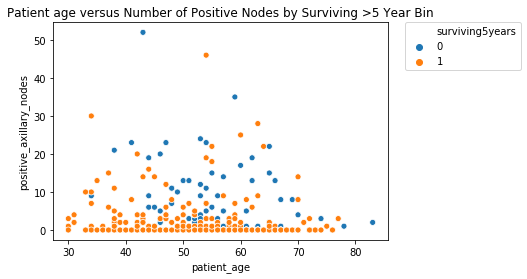

In [36]:
#scatterplot

sns.scatterplot(x='patient_age',y='positive_axillary_nodes',hue='surviving5years',data= df);
plt.title('Patient age versus Number of Positive Nodes by Surviving >5 Year Bin');
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

In [37]:
df['patient_year'].groupby(df['patient_year']).count()

patient_year
58    36
59    27
60    28
61    26
62    23
63    30
64    31
65    28
66    28
67    25
68    13
69    11
Name: patient_year, dtype: int64

In [38]:
#creating one feature for those with more than 5 nodes and less than 5 nodes

df['less_than5_nodes']=np.where(df['positive_axillary_nodes']>5,0,1)
df.head()

,patient_age,patient_year,positive_axillary_nodes,survival_status,surviving5years,age_bins,nodes_bins,less_than5_nodes
0,30,64,1,1,1,"(29, 39]","(-1.001, 5.0]",1
1,30,62,3,1,1,"(29, 39]","(-1.001, 5.0]",1
2,30,65,0,1,1,"(29, 39]","(-1.001, 5.0]",1
3,31,59,2,1,1,"(29, 39]","(-1.001, 5.0]",1
4,31,65,4,1,1,"(29, 39]","(-1.001, 5.0]",1


In [39]:
pd.crosstab(df['surviving5years'], df['less_than5_nodes'],normalize='columns')

less_than5_nodes,0,1
surviving5years,,
0,0.5,0.194915
1,0.5,0.805085


## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival?
- What is at least one feature that looks to have a negative relationship with survival?
- How are those two features related with each other, and what might that mean?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

###Analysis and Interpretation


- What is at least one feature that looks to have a positive relationship with survival?
- What is at least one feature that looks to have a negative relationship with survival?
- How are those two features related with each other, and what might that mean?


**What is at least one feature that looks to have a positive relationship with survival?**

One positive relationship with Survival is early discovery, as we see that younger patients have higher odds of surviving more than 5 years.

In [40]:
pd.crosstab(df['age_bins'], df['surviving5years'],normalize='index')

surviving5years,0,1
age_bins,,
"(29, 39]",0.100000,0.900000
"(39, 49]",0.321429,0.678571
"(49, 59]",0.262626,0.737374
"(59, 69]",0.290323,0.709677
"(69, 79]",0.250000,0.750000
"(79, 89]",1.000000,0.000000


We also see less overall cases towards the last few years of this data, there could have been a confounding variable to contribute to this such as medical breakthrough, hospital budget or medical detection.

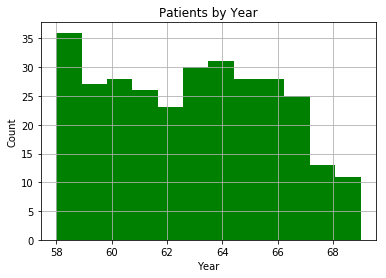

In [41]:
df.patient_year.hist(color='green',bins=12)
plt.title ('Patients by Year')
plt.ylabel('Count')
plt.xlabel('Year')
plt.show()

**What is at least one feature that looks to have a negative relationship with survival?**

One negative relathionship with survival is the total number of positive axillary nodes detected, as we patients with higher amount of nodes detected we see the odds of survival come down.

In [42]:
pd.crosstab(df['surviving5years'], df['nodes_bins'],normalize='index')

nodes_bins,"(-1.001, 5.0]","(10.0, 15.0]","(15.0, 20.0]","(20.0, 25.0]","(25.0, 53.0]","(5.0, 10.0]"
surviving5years,,,,,,
0,0.567901,0.135802,0.049383,0.074074,0.024691,0.148148
1,0.844444,0.031111,0.017778,0.013333,0.013333,0.080000


In [43]:
pd.crosstab(df['surviving5years'], df['less_than5_nodes'],normalize='columns')

less_than5_nodes,0,1
surviving5years,,
0,0.5,0.194915
1,0.5,0.805085


**How are those two features related with each other, and what might that mean?**

Number of positive nodes develop overtime, therefore if we enhance detection we could improve the odds of survival not just by having younger patients but also possibly reduce the amount of positive nodes. Therefore, the hypothesis that early detection will lead to higher survival rates.

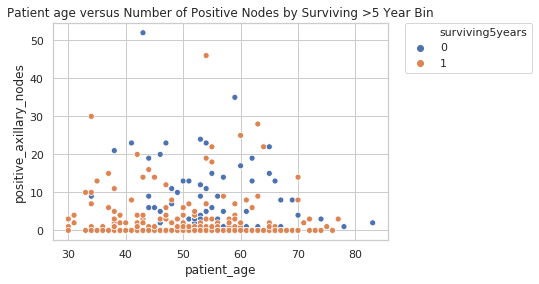

In [44]:
sns.set(style="whitegrid")
sns.scatterplot(x='patient_age',y='positive_axillary_nodes',hue='surviving5years',data= df);
plt.title('Patient age versus Number of Positive Nodes by Surviving >5 Year Bin');
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);